### 1 Toshkent shahrida uylarning narxini aniqlash.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2 Data ni o'qib va kutibxonalarni chaqirish

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import validation_curve

df = pd.read_csv('/content/sample_data/Tashkent_uy_narxlari.csv')

In [ ]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df.shape

(7565, 7)

2.1) Ma'lumotlar turlari (Data Types)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


# 3 Masala shartiga ko'ra uni Classification/Regression masalasiga ajratish 

### Har bir ustun uchun statistika

In [ ]:
#bu masala regression masalasi
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


# 4) Data processing  (ma'lumotlarni qayta ishlash)




---



#### 4.1) Data dagi "Null" qitmatlarni aniqlash

In [ ]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

###4.2) Data ni analiz qilib oling, original datani yo'qotib quymaslik uchun boshqa df2 ga nusha olvolamiz.




In [ ]:
df2=df
df2.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


###4.3) Keraksiz ustunni uchirib yuboramiz*



In [ ]:
df2=df2.drop(['location'],axis=1,inplace=False)
df2

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
df2.head(3)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000


###4.4) Bo'sh - yani NaN qilib olingan ustun qiymatlarini analiz qilish

In [ ]:
#Bizda nan qiymatlar yuq
def missing_values_table(mydf):
        
        mis_val = mydf.isnull().sum()

        mis_val_percent = 100 * mydf.isnull().sum() / len(mydf)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        
        columns = {0 : 'Yetishmayotgan qiymatlar', 1 : '% Toliq ustunning necha foizini tashkil qiladi'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Toliq ustunning necha foizini tashkil qiladi', ascending=False).round(1)
       
        
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df2)

,Yetishmayotgan qiymatlar,% Toliq ustunning necha foizini tashkil qiladi


### 4.5)Dublikatlarni uchirish

In [ ]:
print(sum(df.duplicated()))# 700 dublikat bor ekan


700


In [ ]:
print(sum(df.duplicated()))#700ta takrorlangan qiymat bor ekan
df2=df2.drop_duplicates()#ularni dpop commandasi yordamida tashlab yuboramiz
df2.info()

700
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    6406 non-null   object
 1   rooms       6406 non-null   int64 
 2   size        6406 non-null   object
 3   level       6406 non-null   int64 
 4   max_levels  6406 non-null   int64 
 5   price       6406 non-null   object
dtypes: int64(3), object(3)
memory usage: 350.3+ KB


In [ ]:
df2['size'].replace({'Площадьземли:1сот':'100','70000':'70','24500':'24.5','3448':'34.5','44000':'44','69000':'69','67000':'67','7407':'74.07','4':'40','7359':'73.5','2100':'210','3':'80', '1':'50'}, inplace=True) 
df2['size'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

###4.6.) Data ustunlarining "object" hotidagilarini Float yani sonli ko'rinishga

In [ ]:
df2['size']=df2['size'].astype(dtype=float)
df2['size'].unique()
df2.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rooms,size,level,max_levels
count,6406.000000,6406.000000,6406.000000,6406.000000
mean,2.634093,73.800578,3.724477,6.082267
std,1.082853,37.598112,2.265814,2.625630
min,1.000000,3.800000,1.000000,1.000000
25%,2.000000,50.075000,2.000000,4.000000
50%,3.000000,67.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,500.000000,19.000000,25.000000


### 4.7) Договорная qiymatlarni uchiramiz

In [ ]:
df2=df2.drop(df2[df2['price']=='Договорная'].index)

In [ ]:
df2['price']=df2['price'].astype(dtype=float)
df2.describe()

,rooms,size,level,max_levels,price
count,6313.000000,6313.000000,6313.000000,6313.000000,6.313000e+03
mean,2.630128,73.498289,3.718676,6.066688,7.365147e+04
std,1.080222,37.354282,2.265293,2.618150,6.961705e+05
min,1.000000,3.800000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.160000,3.000000,5.000000,4.700000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,500.000000,19.000000,25.000000,5.200000e+07


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    6313 non-null   object 
 1   rooms       6313 non-null   int64  
 2   size        6313 non-null   float64
 3   level       6313 non-null   int64  
 4   max_levels  6313 non-null   int64  
 5   price       6313 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 345.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


### 4.7) Object turidagi ma'lumotlarni int turiga utkazamiz

In [ ]:
def encode_df(dataframe):
    le = LabelEncoder()
    for c in dataframe.columns:
          dataframe[c] = le.fit_transform(dataframe[c])
    return dataframe

In [ ]:
df2 = encode_df(df2)
df2

,district,rooms,size,level,max_levels,price
0,8,2,116,3,3,355
1,9,1,94,3,4,381
2,6,1,60,3,3,227
3,6,2,151,0,3,335
4,6,2,172,2,4,373
...,...,...,...,...,...,...
7560,11,0,45,4,4,101
7561,11,1,83,0,3,176
7562,7,1,145,2,8,263
7563,2,0,10,0,3,14


Null qiymatlar bor yoki yuqligini tekshiramiz

In [ ]:
df2.isnull().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [ ]:
df2.head()

,district,rooms,size,level,max_levels,price
0,8,2,116,3,3,355
1,9,1,94,3,4,381
2,6,1,60,3,3,227
3,6,2,151,0,3,335
4,6,2,172,2,4,373


###4.8)Ma'lumotlarini tahlil qilish (Exploratory Data Analysis)

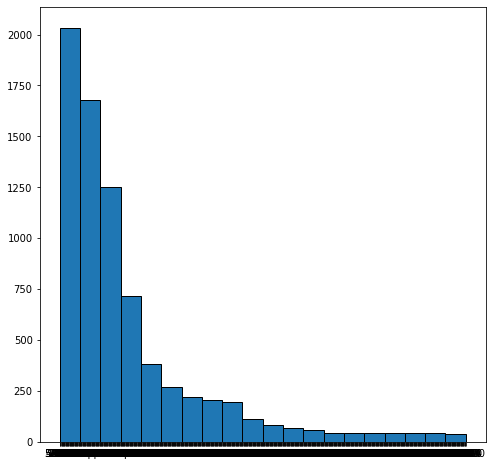

In [ ]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(df['price'].dropna(), bins = 20, edgecolor = 'black');

In [ ]:
df2['price'].describe()

count    6.313000e+03
mean     7.365147e+04
std      6.961705e+05
min      2.000000e+00
25%      3.500000e+04
50%      4.700000e+04
75%      6.700000e+04
max      5.200000e+07
Name: price, dtype: float64

In [ ]:
df2['price'].describe().dropna().sort_values().tail(10)

min         0.000000
std       157.455697
25%       211.000000
50%       322.000000
mean      330.590527
75%       447.000000
max       715.000000
count    6313.000000
Name: price, dtype: float64

In [ ]:
# Birinchi va uchinchi kvartilni hisoblash
first_quartile = df2['price'].describe()['25%']
third_quartile = df2['price'].describe()['75%']

# Kvartallar oralig'i
iqr = third_quartile - first_quartile

#  G'ayrioddiy qiymatlarni olib tashlash
df2 = df2[(df2['price'] > (first_quartile - 3 * iqr)) &
            (df2['price'] < (third_quartile + 3 * iqr))]

### 4.9)G'ayrioddiy qiymatlarni olib tashlash (Removing Outliers)

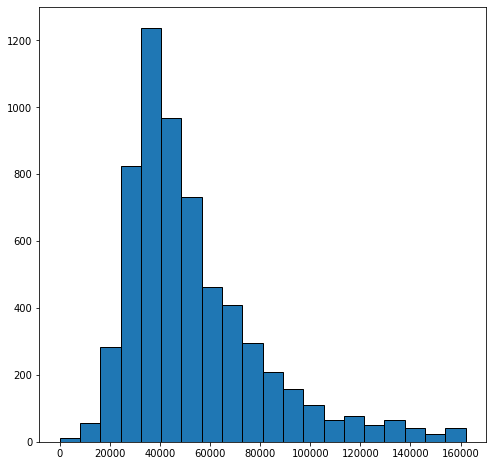

In [ ]:
figsize(8, 8)
plt.hist(df2['price'].dropna(), bins = 20, edgecolor = 'black');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


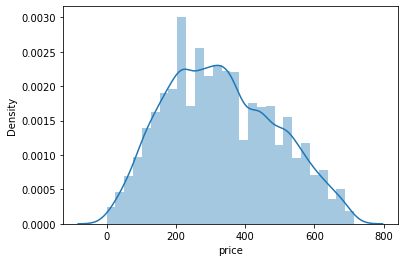

In [ ]:
import seaborn as sns

sns.distplot(df2['price'])

Korelasiya ko'rinishi

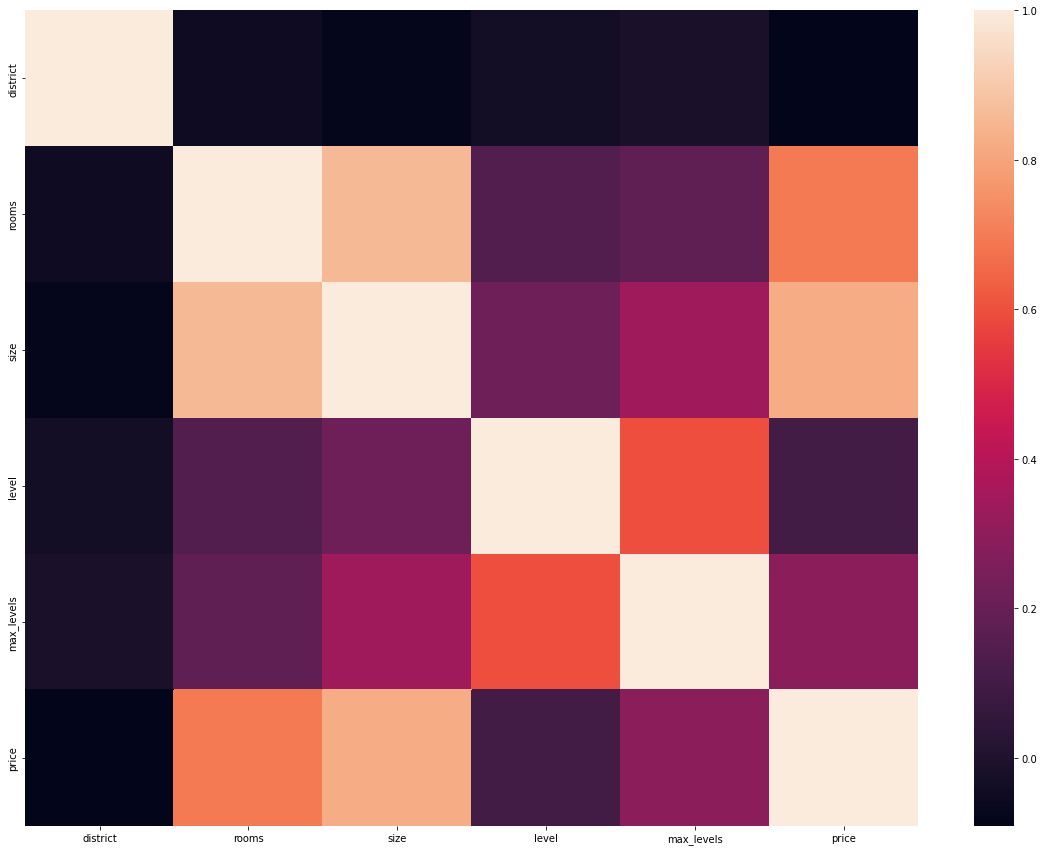

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr())

###5.1. "X" - row data va "y" - Target ni aniqlab olish

In [ ]:
y = df2['price']
x = df2.drop(['price'], axis = 1, inplace=False)# seperaing the dataset into x and y, where y is the only "Outcome" column and the x is the rest of the
#dataset


In [ ]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))

Counter({355: 136, 381: 136, 227: 136, 335: 136, 373: 136, 111: 136, 64: 136, 56: 136, 120: 136, 72: 136, 99: 136, 158: 136, 75: 136, 180: 136, 305: 136, 322: 136, 338: 136, 488: 136, 438: 136, 326: 136, 157: 136, 176: 136, 297: 136, 384: 136, 211: 136, 87: 136, 414: 136, 451: 136, 274: 136, 357: 136, 288: 136, 504: 136, 278: 136, 83: 136, 526: 136, 548: 136, 143: 136, 201: 136, 349: 136, 328: 136, 263: 136, 447: 136, 268: 136, 366: 136, 220: 136, 428: 136, 429: 136, 462: 136, 532: 136, 512: 136, 54: 136, 341: 136, 521: 136, 169: 136, 123: 136, 31: 136, 128: 136, 405: 136, 323: 136, 239: 136, 151: 136, 421: 136, 316: 136, 397: 136, 118: 136, 562: 136, 362: 136, 20: 136, 565: 136, 254: 136, 411: 136, 333: 136, 45: 136, 284: 136, 312: 136, 98: 136, 396: 136, 376: 136, 164: 136, 271: 136, 343: 136, 24: 136, 306: 136, 360: 136, 112: 136, 214: 136, 222: 136, 618: 136, 518: 136, 570: 136, 455: 136, 146: 136, 195: 136, 105: 136, 252: 136, 590: 136, 138: 136, 291: 136, 262: 136, 101: 136, 659:

###5.2. Data ni TRAIN va TEST qismlarga ajratib olish

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
print(X_train.shape, X_test.shape)

(68163, 5) (29213, 5)


In [ ]:
print(y_train.shape, y_test.shape)

(68163,) (29213,)


#1 Model ni yaratish (Linear Regression Model)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions= lm.predict(X_test)

In [ ]:
predictions

array([374.04711963, 443.14345248, 429.17394857, ..., 733.41507793,
       122.41177195, 165.96985671])

In [ ]:
lm.intercept_

54.17808994512495

In [ ]:
lm.coef_

array([ -0.5293378 ,  -4.01452207,   1.80239163, -10.40423599,
         5.17852277])

In [ ]:
pred1 = lm.predict(X_test)

In [ ]:
pred1

array([374.04711963, 443.14345248, 429.17394857, ..., 733.41507793,
       122.41177195, 165.96985671])

In [ ]:
print("Mean squared error: %.2f" % np.mean((pred1 - y_test) ** 2))

Mean squared error: 12368.07


In [ ]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 0.71


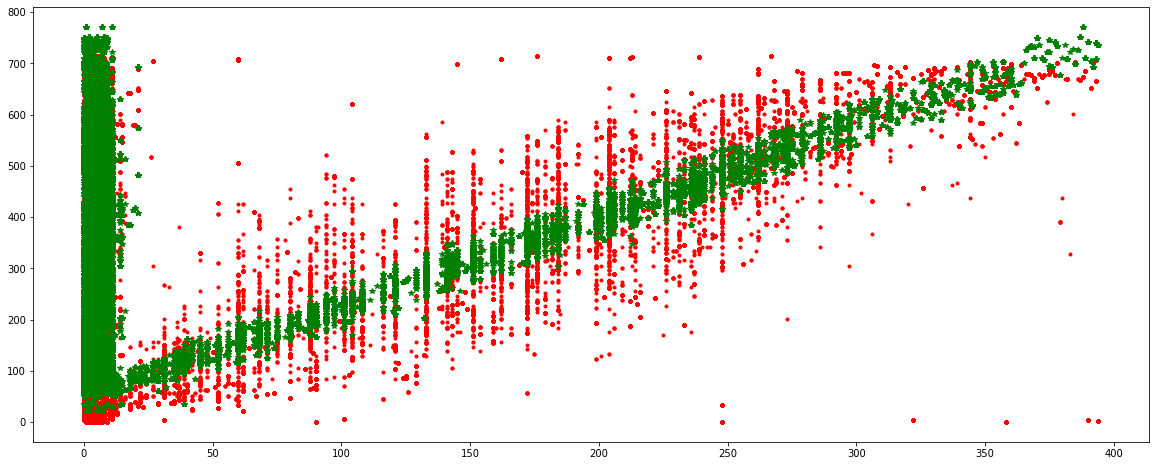

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,pred1,'g*')
plt.show()

#2.GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_predg = gb.predict(X_test)
mean_absolute_error(y_predg, y_test)

54.44133880491685

In [ ]:
print('Variance score: %.2f' % gb.score(X_test , y_test))

Variance score: 0.85


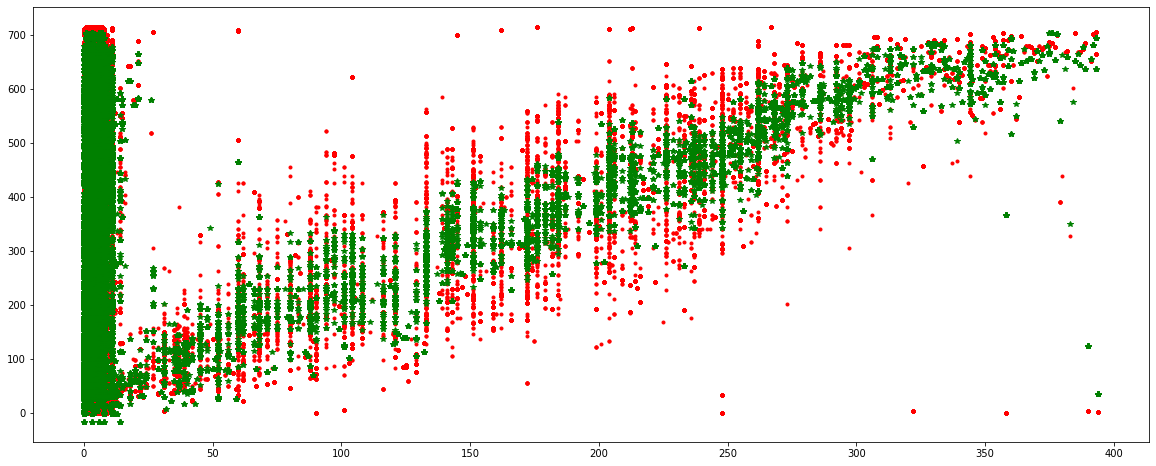

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predg,'g*')
plt.show()

#3.AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_preda = ab.predict(X_test)
mean_absolute_error(y_preda, y_test)

97.67323285952652

In [ ]:
print('Variance score: %.2f' % ab.score(X_test, y_test))

Variance score: 0.66


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_preda)

0.6652191715961724

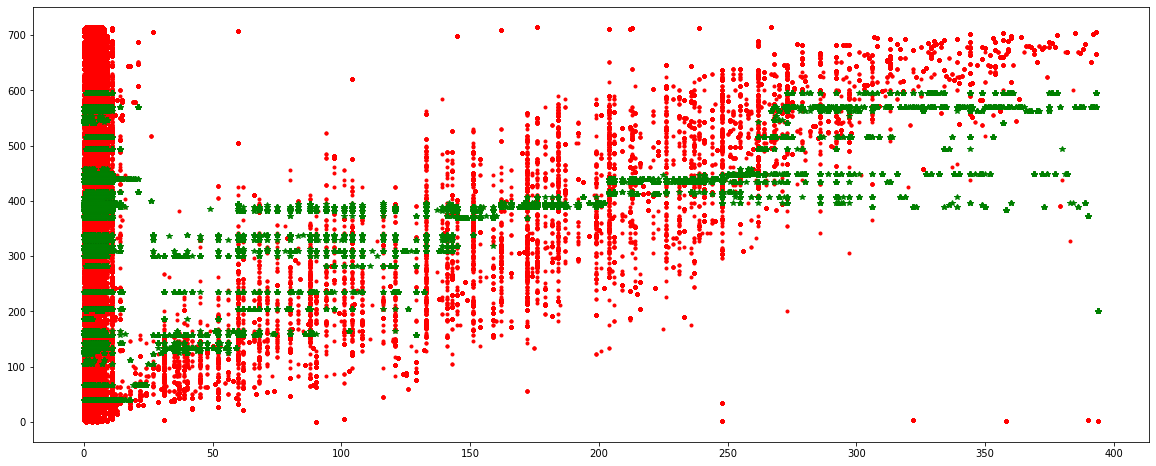

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_preda,'g*')
plt.show()

#4.ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(X_train, y_train)
y_predex = ext.predict(X_test)
mean_absolute_error(y_predex, y_test)

6.828390139085091

In [ ]:
print('Variance score: %.2f' % ext.score(X_test, y_test))

Variance score: 0.99


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,y_predex)

0.9879593190929684

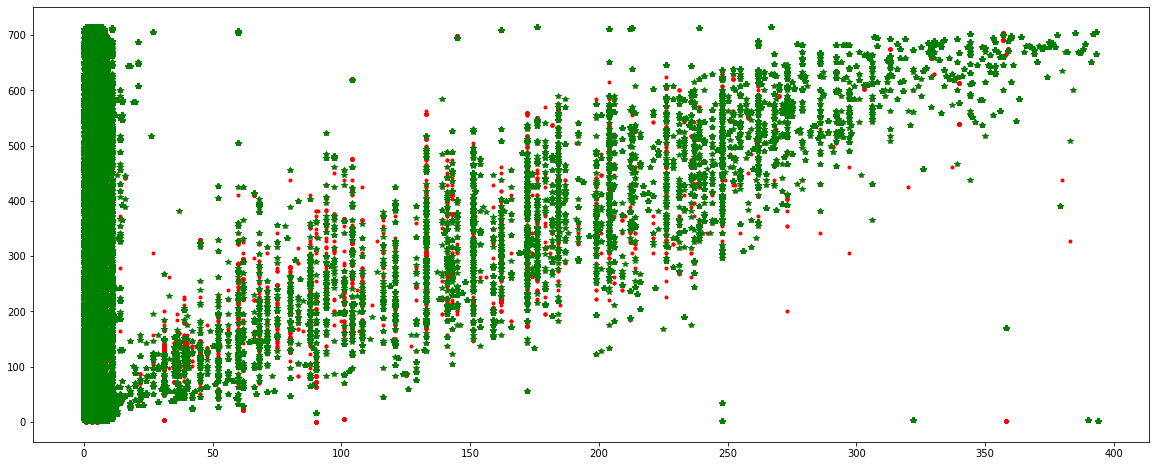

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predex,'g*')
plt.show()


#5.DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predt = dt.predict(X_test)
mean_absolute_error(y_predt, y_test)

7.127931732241015

In [ ]:
print('Variance score: %.2f' % dt.score(X_test, y_test))

Variance score: 0.99


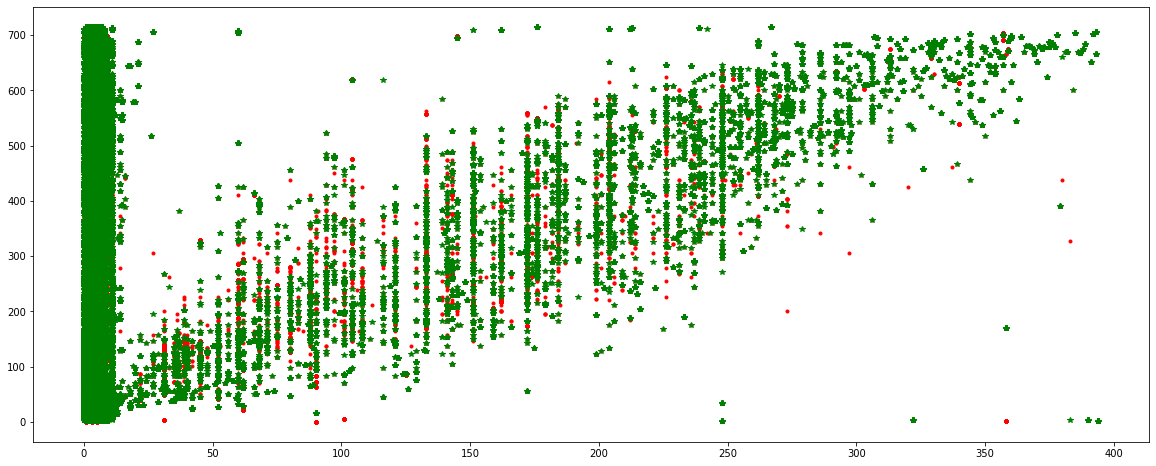

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predt,'g*')
plt.show()

In [ ]:
max(y_test)

In [ ]:
print(y_predt[:10])
print(y_test[:10].to_numpy())

[541.         559.26470588 415.         628.         654.
 147.2        114.         433.          83.         165.        ]
[541 604 415 628 655 143 114 433 227 165]



#6.SVR

In [ ]:
# from sklearn.svm import SVR
# sv = SVR()
# sv.fit(X_train, y_train)
# y_predsv = sv.predict(X_test)
# mean_absolute_error(y_predsv, y_test)

75.43194669453518

In [ ]:
# print('Variance score: %.2f' % sv.score(X_test, y_test))

Variance score: 0.70


In [ ]:
# plt.figure(figsize=(20,20))
# plt.plot(X_test,y_test,'r.')
# plt.plot(X_test,y_predtsv,'g*')
# plt.show()

#7.RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predr = rf.predict(X_test)
print(mean_absolute_error(y_predr, y_test))

print('Variance score: %.2f' % rf.score(X_test, y_test))

In [ ]:
print('Variance score: %.2f' % rf.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predr,'g*')
plt.show()


  
#8.KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
mean_absolute_error(y_predknn, y_test)

In [ ]:
print('Variance score: %.2f' % knn.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_predknn,'g*')
plt.show()

#Model ni saqlash

In [ ]:
filename = 'uy_narxi1.sav'
pickle.dump(ext, open(filename, 'wb'))